# Customer Churn Analysis 

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

# Importing the required libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importing the dataset

In [17]:
data=pd.read_csv('Cutsomer Churn.csv')

In [18]:
data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [19]:
data.drop(['phone number'],axis=1,inplace=True)

# Familiarisation with the data

In [20]:
data.shape

(3333, 20)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64


In [22]:
data.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [24]:
data.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

# Null/Missing value Analysis

In [23]:
data.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

>No Null/Missing Value is present

In [ ]:
Data Visualisation using CountPlot

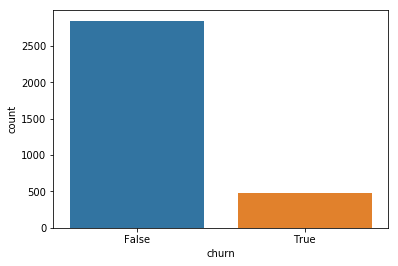

In [25]:
sns.countplot(x='churn',data=data)

>It can be seen from the count plot that there are less count for exiting customer as True churn is less

# Data Visualisation using box plots 

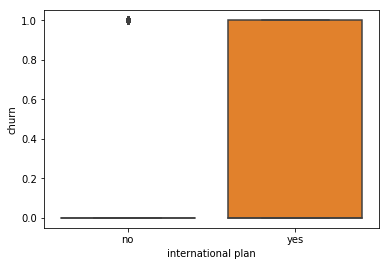

In [26]:
sns.boxplot(x='international plan',y='churn',data=data)

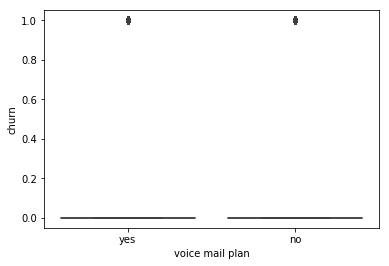

In [27]:
sns.boxplot(x='voice mail plan',y='churn',data=data)

# Encoding the non-numerical features into numerical 

# Data Visulaisation using Histogram Plots

In [29]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
attr=['state','voice mail plan','international plan','churn']
for i in attr:
    data[i]=Le.fit_transform(data[i].astype(str))

In [31]:
data.describe()

state  account length    area code  international plan  \
count  3333.000000     3333.000000  3333.000000         3333.000000   
mean     26.059406      101.064806   437.182418            0.096910   
std      14.824911       39.822106    42.371290            0.295879   
min       0.000000        1.000000   408.000000            0.000000   
25%      14.000000       74.000000   408.000000            0.000000   
50%      26.000000      101.000000   415.000000            0.000000   
75%      39.000000      127.000000   510.000000            0.000000   
max      50.000000      243.000000   510.000000            1.000000   

       voice mail plan  number vmail messages  total day minutes  \
count      3333.000000            3333.000000        3333.000000   
mean          0.276628               8.099010         179.775098   
std           0.447398              13.688365          54.467389   
min           0.000000               0.000000           0.000000   
25%           0.000000               0.000000         143.700000   
50%           0.000000               0.000000         179.400000   
75%           1.000000              20.000000         216.400000   
max           1.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls        churn  
count        3333.000000             3333.000000  3333.000000  
mean            2.764581                1.562856     0.144914  
std             0.753773                1.315491     0.352067  
min             0.000000                0.000000     0.000000  
25%             2.300000                1.000000     0.000000  
50%             2.780000                1.000000     0.000000  
75%             3.270000                2.000000     0.000000  
max             5.400000                9.000000     1.000000

# Histogram Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001794A2419B0>,
      dtype=object)

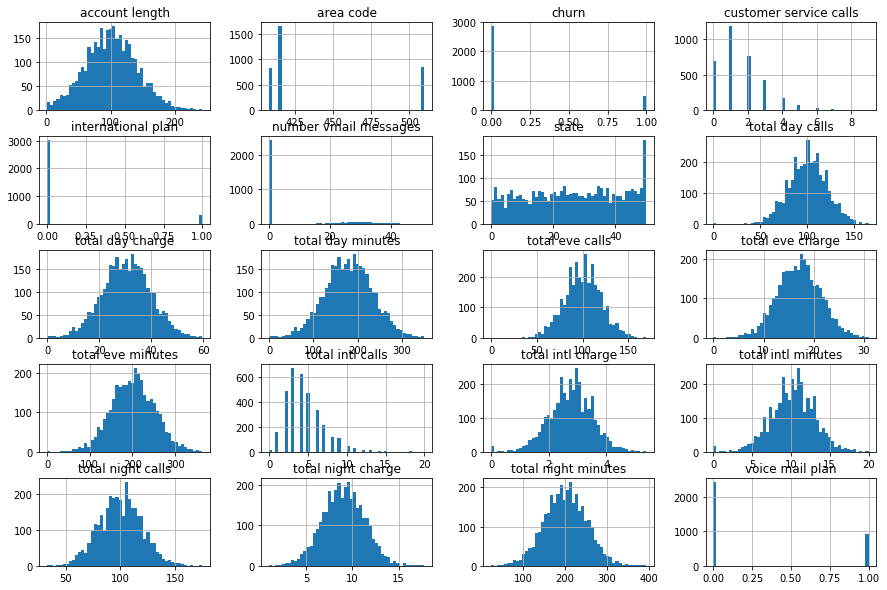

In [30]:
data.hist(bins=50,figsize=(15,10))

>From the histogram plots it is seen that most of the features for the dataset is correctly skewed

# Data Visulaisation using PairPlots

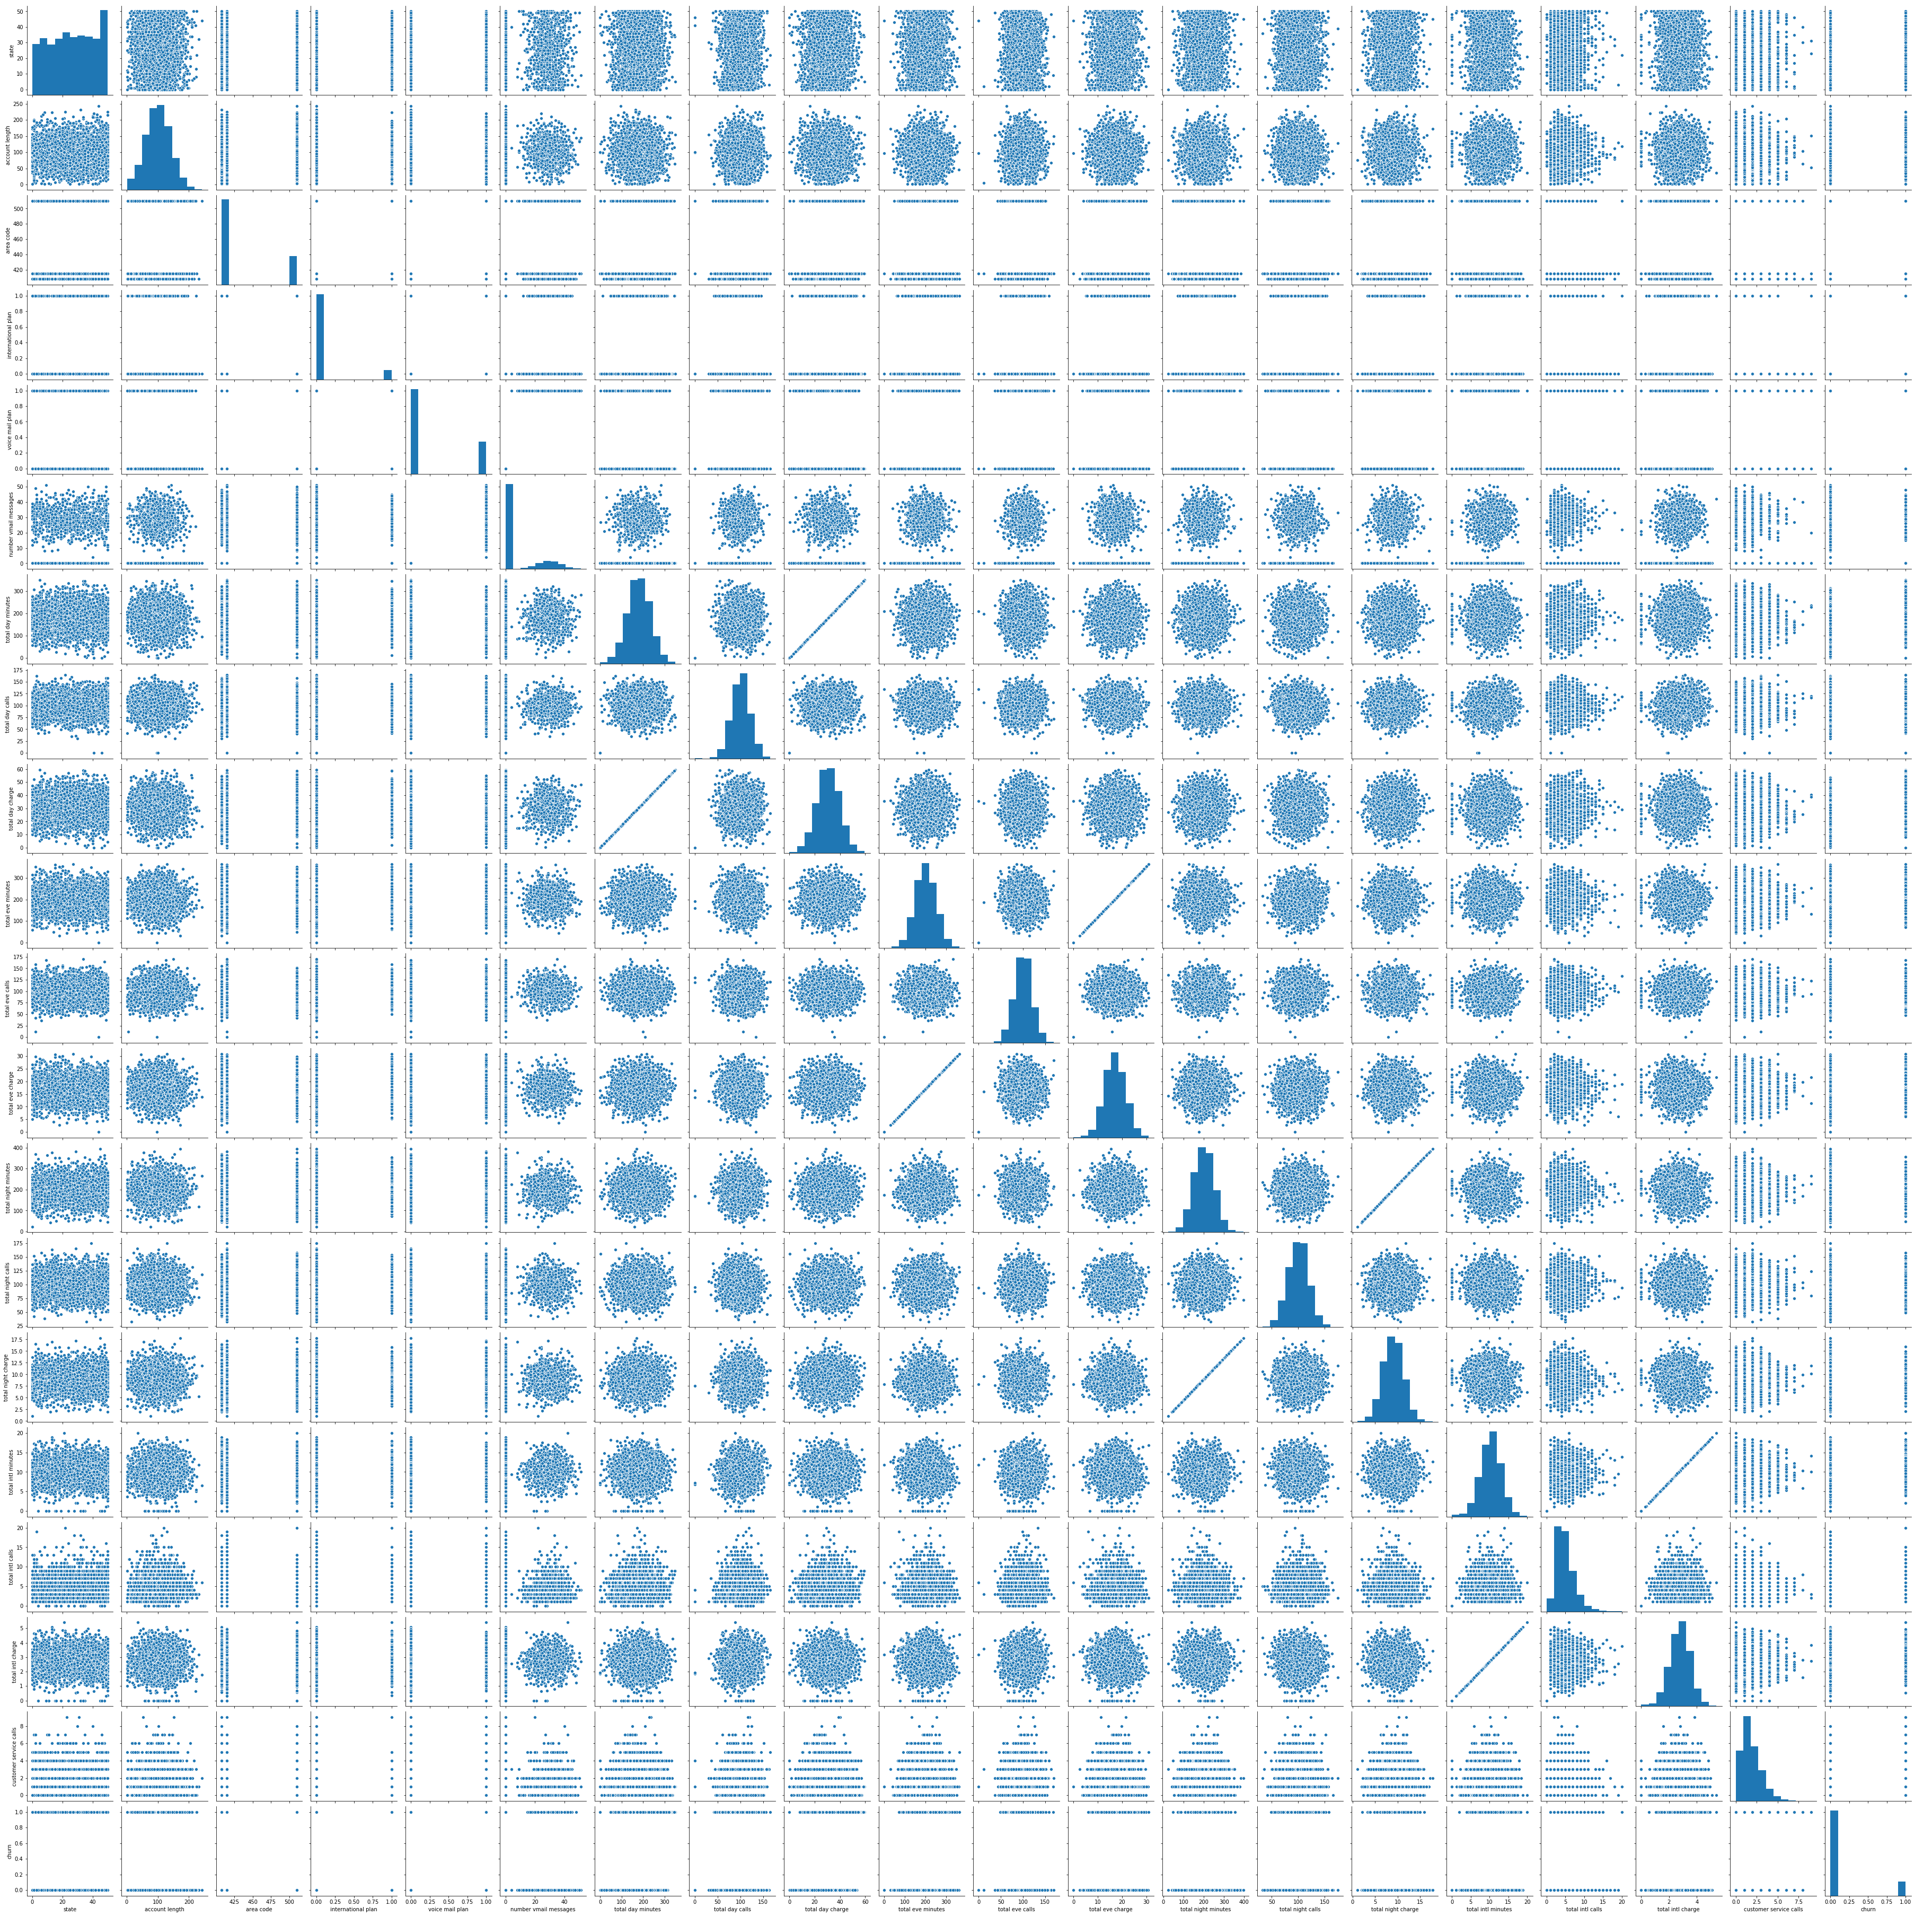

In [33]:
sns.pairplot(data)

# Skewness analysis

In [34]:
data.skew()

state                    -0.064618
account length            0.096606
area code                 1.126823
international plan        2.726332
voice mail plan           0.999140
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

In [35]:
from scipy import stats
for col in data.columns[:-1]:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

> Here in this section skewness is analysed and as skewness which can also be seen from the distribution plots in some features is treated in this section using log transformation . We will also be using scaling technique to remove the skewness in this project.

In [36]:
data.skew()

state                    -0.064618
account length            0.096606
area code                 1.122881
international plan        2.726332
voice mail plan           0.999140
number vmail messages     1.028178
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls         -0.199368
total intl charge        -0.245287
customer service calls   -0.138568
churn                     2.018356
dtype: float64

# CorRelation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

(3333, 20)

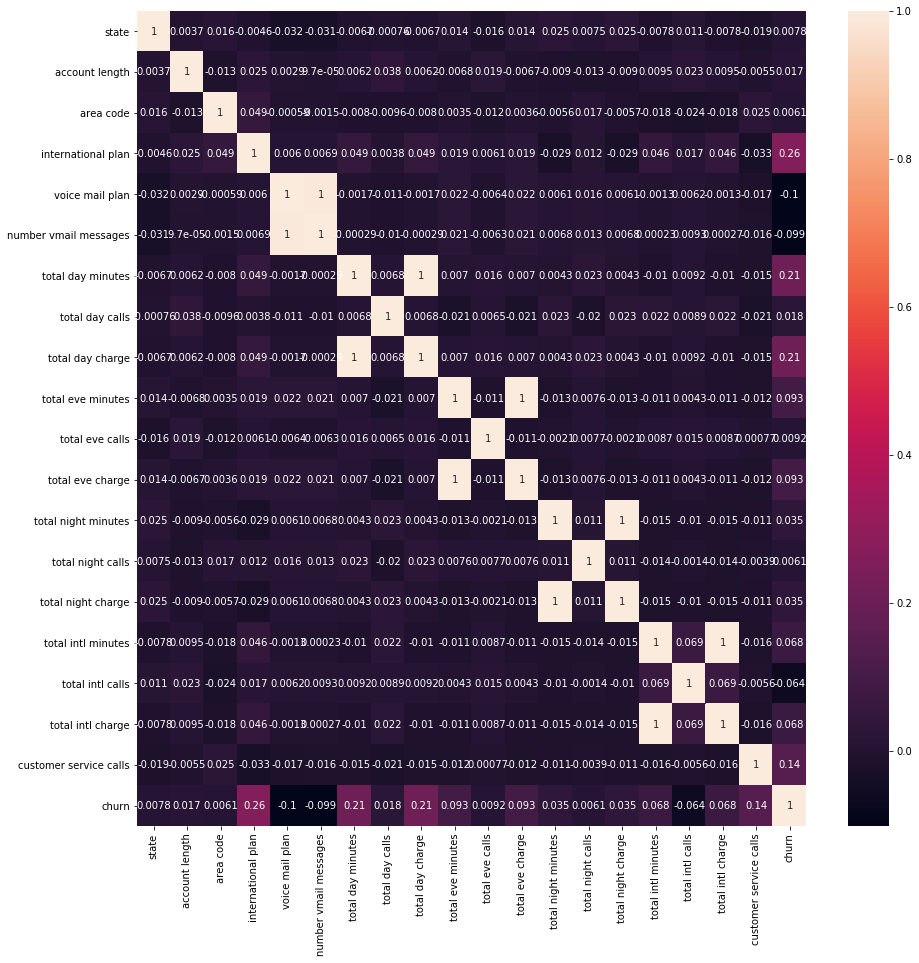

In [37]:
plt.figure(figsize=(15,15))
df_cor=data.corr()
sns.heatmap(df_cor,annot=True)
data.shape

# Feature selection based on correlation matrix
From the below code I have removed the features which are having correlation of more than 0.9. This results in stable parameter estimates of classification which makes it easy to assess the effect of independent variables on dependent variables

In [38]:
columns = np.full((df_cor.shape[0]),True,dtype=bool)
for i in range(df_cor.shape[0]):
    for j in range(i+1, df_cor.shape[0]):
        if df_cor.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [39]:
data.shape

(3333, 15)

>We can see after removing the highly correlated features , the shape of the data changed to (3333, 15)

In [40]:
data.head()

state  account length  area code  international plan  voice mail plan  \
0     16             128   6.030685            0.000000         0.693147   
1     35             107   6.030685            0.000000         0.693147   
2     31             137   6.030685            0.000000         0.000000   
3     35              84   6.013715            0.693147         0.000000   
4     36              75   6.030685            0.693147         0.000000   

   total day minutes  total day calls  total eve minutes  total eve calls  \
0              265.1              110              197.4               99   
1              161.6              123              195.5              103   
2              243.4              114              121.2              110   
3              299.4               71               61.9               88   
4              166.7              113              148.3              122   

   total night minutes  total night calls  total intl minutes  \
0                244.7                 91                10.0   
1                254.4                103                13.7   
2                162.6                104                12.2   
3                196.9                 89                 6.6   
4                186.9                121                10.1   

   total intl calls  customer service calls  churn  
0          1.386294                0.693147      0  
1          1.386294                0.693147      0  
2          1.791759                0.000000      0  
3          2.079442                1.098612      0  
4          1.386294                1.386294      0

# Handling OutLiers

In [41]:
from scipy.stats import zscore
zs=np.abs(zscore(data))
zs

array([[0.6786493 , 0.67648946, 0.51684318, ..., 0.49853544, 0.22682722,
        0.41167182],
       [0.6031696 , 0.14906505, 0.51684318, ..., 0.49853544, 0.22682722,
        0.41167182],
       [0.33331299, 0.9025285 , 0.51684318, ..., 0.42112115, 1.5607056 ,
        0.41167182],
       ...,
       [0.87302621, 1.83505538, 1.71785261, ..., 0.77075836, 0.55344162,
        0.41167182],
       [1.35329082, 2.08295458, 1.71785261, ..., 1.79592943, 0.55344162,
        0.41167182],
       [1.07541867, 0.67974475, 0.51684318, ..., 0.00758811, 1.5607056 ,
        0.41167182]])

In [42]:
df=data[(zs<3).all(axis=1)]
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (3333, 15)
shape of the data without  outliers   (2936, 15)


In this section we have treated the outliers with the help of ZSCORE using threshold value as 3 ,The features which are having the zscore value > 3 are treated as outliers and have been removed.

Hence the new shape of the dataset after outliers removal is (2936, 15) . Now this will be our finalised Dataset for modelling.

# Normalisation of the dataset

In [43]:
y=df['churn']
x=df.iloc[:,:-1]


In [44]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(x)

In [45]:
x.head()

0         1         2    3        4         5         6         7  \
0 -0.677506  0.694274 -0.507127  0.0  1.62009  1.598417  0.484849 -0.068305   
1  0.603907  0.164541 -0.507127  0.0  1.62009 -0.331220  1.148659 -0.106506   
2  0.334136  0.921303 -0.507127  0.0 -0.61725  1.193846  0.689098 -1.600343   
3 -0.475177  0.517696  1.744432  0.0  1.62009  0.724021 -0.638523  2.969632   
4 -0.542620  0.416795 -0.692893  0.0 -0.61725  0.095724 -0.178962  3.031959   

          8         9        10        11        12        13  
0 -0.059716  0.879887 -0.464407 -0.100521 -0.535924 -0.237819  
1  0.142680  1.075776  0.154357  1.281908 -0.535924 -0.237819  
2  0.496873 -0.778107  0.205921  0.721464  0.424925 -1.577737  
3  0.395675  0.231634  0.927812 -1.034595  1.106658  1.102100  
4 -1.021097  0.296257 -0.515970 -0.586239 -0.007131 -0.237819

# Naming the columns After Normalising the Dataset

In [46]:
x.columns=['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'customer service calls']

In [47]:
x.drop(['international plan'],axis =1,inplace =True)

In [48]:
x.head()

state  account length  area code  voice mail plan  total day minutes  \
0 -0.677506        0.694274  -0.507127          1.62009           1.598417   
1  0.603907        0.164541  -0.507127          1.62009          -0.331220   
2  0.334136        0.921303  -0.507127         -0.61725           1.193846   
3 -0.475177        0.517696   1.744432          1.62009           0.724021   
4 -0.542620        0.416795  -0.692893         -0.61725           0.095724   

   total day calls  total eve minutes  total eve calls  total night minutes  \
0         0.484849          -0.068305        -0.059716             0.879887   
1         1.148659          -0.106506         0.142680             1.075776   
2         0.689098          -1.600343         0.496873            -0.778107   
3        -0.638523           2.969632         0.395675             0.231634   
4        -0.178962           3.031959        -1.021097             0.296257   

   total night calls  total intl minutes  total intl calls  \
0          -0.464407           -0.100521         -0.535924   
1           0.154357            1.281908         -0.535924   
2           0.205921            0.721464          0.424925   
3           0.927812           -1.034595          1.106658   
4          -0.515970           -0.586239         -0.007131   

   customer service calls  
0               -0.237819  
1               -0.237819  
2               -1.577737  
3                1.102100  
4               -0.237819

# Applying Various Classification Models

In this section we will be applying several classification models and hence we will be checking following performance matrix :

1) Accuracy score

2) AUC Score

3) Mean of crossing validation score using accuracy as scoring

4) Std Deviation of crossing validation score using accuracy as scoring

5) Confusion Matrix

We have also used GridSearch for tuning the parameters

Importing all the required library

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Function for Accuracy Score
This function is built to find the best accuracy score depending on the random state while splitting the model. This function prints the best accuracy score and returns the random state for that accuracy score

In [50]:
def accur_at_rstate(model,x,y):
    random_state=np.arange(42,101)
    accuracy=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        #DT=DecisionTreeClassifier()
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if accuracy_score(test_y,pred) > accuracy:
            accuracy=accuracy_score(test_y,pred)
            Final_r_state=r_state
        #Calculating 
    print('The maximum accuracy reached is {} at random state {}' .format(accuracy,Final_r_state))
    return Final_r_state

# Function for Auc Score and Confusion Matrix
This function will result in auc score for model and also print the confusion matrix

In [51]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
def roc_curve(model,r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
    fpr_tr,tpr_tr,threshold = metrics.roc_curve(train_y,model.predict_proba(train_x)[:,1])
    fpr_test,tpr_test,threshold = metrics.roc_curve(test_y,model.predict_proba(test_x)[:,1])
    plt.plot(fpr_tr,tpr_tr ,label="train AUC ="+str(metrics.auc(fpr_tr,tpr_tr)))
    plt.plot(fpr_test,tpr_test ,label="test AUC ="+str(metrics.auc(fpr_test,tpr_test)))
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()
    pred=model.predict(test_x)
    sns.heatmap(confusion_matrix(test_y,pred),annot=True)

# Function for highest_accuracy
This function finds the highest_accuracy of the model

In [52]:
def highest_accuracy(model,x,y,Final_r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=Final_r_state)
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    return accuracy_score(test_y,pred)

Below function is created to make a list of highest_accuracy generated by different classifier , so that it can be compared at last, for the selection of the best model

In [53]:
accuracy=[]
def list_accuracy(x):
    accuracy.append(x)
    return accuracy

# 1.DecisionTreeClassifier

In [54]:
from sklearn.model_selection import GridSearchCV
#max_depth = np.arange(30)
depth={'max_depth':range(1,30)}
DT=DecisionTreeClassifier()
gs=GridSearchCV(DT,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 6}

The maximum accuracy reached is 0.9580022701475596 at random state 64
Cross_val_score  0.9444807565274832


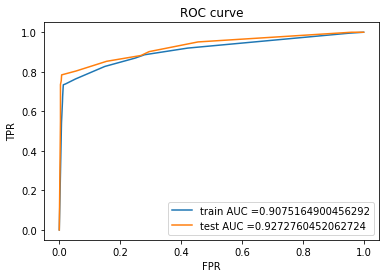

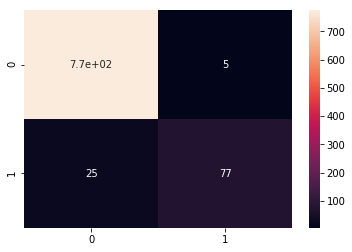

In [55]:
DT=DecisionTreeClassifier(max_depth=6)
Final_Random_state=accur_at_rstate(DT,x,y)
from sklearn.model_selection import cross_val_score
print('Cross_val_score ',cross_val_score(DT,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(DT,Final_Random_state)

In [56]:
Max_accuracy=highest_accuracy(DT,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 2.KNeighborsClassifier

In [57]:
from sklearn.model_selection import GridSearchCV
neighbour={'n_neighbors':range(1,50),'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Knn=KNeighborsClassifier()
gs=GridSearchCV(Knn,neighbour,cv=10)
gs.fit(x,y)
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 5}

The maximum accuracy reached is 0.923950056753689 at random state 88
Cross_val_score  0.902247679310225


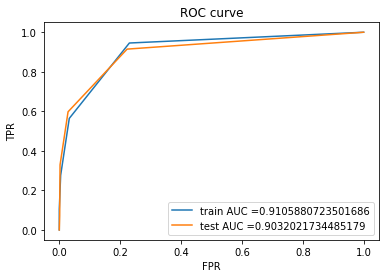

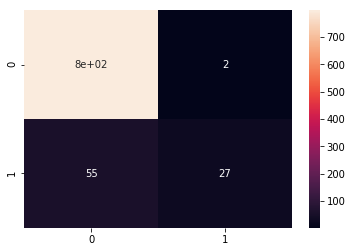

In [58]:
from sklearn.model_selection import cross_val_score
Knn=KNeighborsClassifier(n_neighbors=5,algorithm='auto')
Final_Random_state=accur_at_rstate(Knn,x,y)
print('Cross_val_score ',cross_val_score(Knn,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(Knn,Final_Random_state)

In [59]:
Max_accuracy=highest_accuracy(Knn,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 3.Naive Bayes

In [60]:
from sklearn.naive_bayes import BernoulliNB
alpha={'alpha':range(1,30)}
NB=BernoulliNB()
gs=GridSearchCV(NB,alpha,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 1}

The maximum accuracy reached is 0.9069239500567536 at random state 88
Cross_val_score  0.8845368471068153


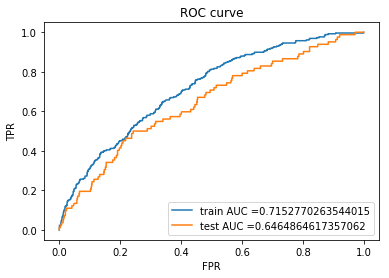

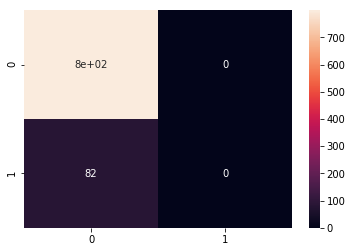

In [61]:
NB=BernoulliNB(alpha=1)
Final_Random_state=accur_at_rstate(NB,x,y)
print('Cross_val_score ',cross_val_score(NB,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(NB,Final_Random_state)

In [62]:
Max_accuracy=highest_accuracy(NB,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 4.Support Vector Classifier

In [68]:
gamma={'gamma':range(1,30)}
svc=SVC(kernel='rbf')
gs=GridSearchCV(svc,gamma,cv=10)
gs.fit(x,y)
gs.best_params_

{'gamma': 1}

In [69]:
svc=SVC(gamma=1,kernel='rbf')
Final_Random_state=accur_at_rstate(svc,x,y)
print('Cross_val_score ',cross_val_score(svc,x,y,cv=5 ,scoring='accuracy').mean())

The maximum accuracy reached is 0.9069239500567536 at random state 88
Cross_val_score  0.8845368471068153


In [70]:
Max_accuracy=highest_accuracy(svc,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 4.Logistic Regression

In [72]:
C={'C':range(1,30),'penalty':['l1', 'l2', 'elasticnet']}
log=LogisticRegression()
gs=GridSearchCV(log,C,cv=10)
gs.fit(x,y)
gs.best_params_

{'C': 1, 'penalty': 'l2'}

The maximum accuracy reached is 0.9148694665153235 at random state 50
Cross_val_score  0.8974794006188507


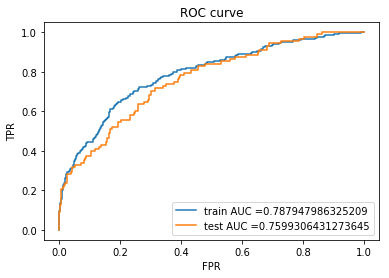

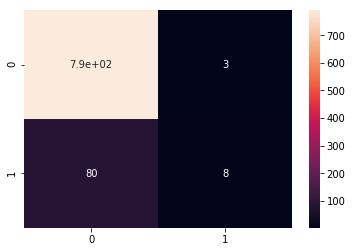

In [73]:
log=LogisticRegression(C=1,penalty='l2')
Final_Random_state=accur_at_rstate(log,x,y)
print('Cross_val_score ',cross_val_score(log,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(log,Final_Random_state)

In [74]:
Max_accuracy=highest_accuracy(log,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# Appying ensemble model for better results

# 1.RandomForestClassifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':range(1,50),'max_depth':range(1,30)}
RF=RandomForestClassifier()
gs=GridSearchCV(RF,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 24, 'n_estimators': 45}

The maximum accuracy reached is 0.9557321225879682 at random state 42
Cross_val_score  0.9499304662239683


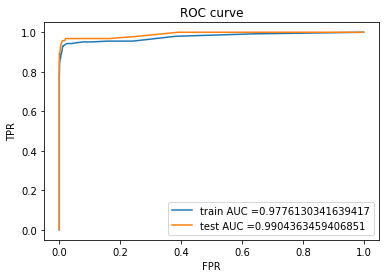

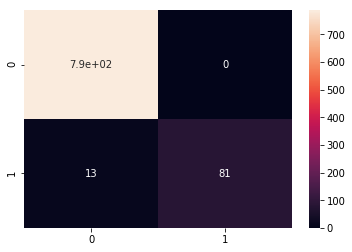

In [76]:
RF=RandomForestClassifier(n_estimators=45,max_depth=24)
Final_Random_state=accur_at_rstate(RF,x,y)
print('Cross_val_score ',cross_val_score(RF,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(RF,Final_Random_state)

In [77]:
Max_accuracy=highest_accuracy(RF,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 2.BaggingClassifier

In [78]:
from sklearn.ensemble import BaggingClassifier
parameters={'n_estimators':range(1,30),'base_estimator':[log,NB,Knn,DT]}
BG=BaggingClassifier()
gs=GridSearchCV(BG,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=6, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'n_estimators': 23}

The maximum accuracy reached is 0.9614074914869466 at random state 47
Cross_val_score  0.9499316251202355


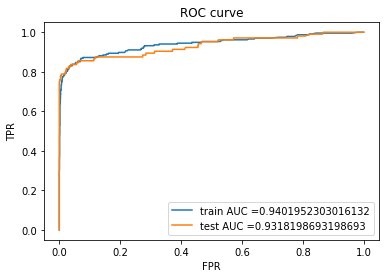

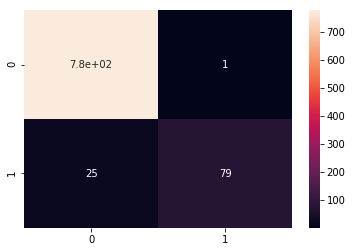

In [79]:
BG=BaggingClassifier(n_estimators=23,base_estimator=DT)
Final_Random_state=accur_at_rstate(BG,x,y)
print('Cross_val_score ',cross_val_score(BG,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(BG,Final_Random_state)

In [80]:
Max_accuracy=highest_accuracy(BG,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# Plotting Bargraph to Analyse the Performance Matrix

In [81]:
model =['DT','KNN','NB','LOG','RF','SVC','BAGGING']

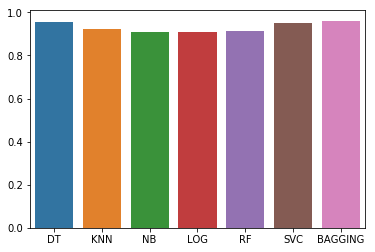

In [82]:
sns.barplot(x=model,y=List_acc)

From the above barplot --> KNeighborsClassifier has highest accuracy

After performing several classification models on this data set and after analysing the performance matrix for all the models , it is concluded that BaggingClassifier is giving the best results which are as follows :

The maximum accuracy reached is 0.9614074914869466 at random state 47

Cross_val_score  0.9499316251202355

AUC score --0.93 which is almost trackinG the train AUC

True Postive = 78 , True Negative = 79

Therefore BaggingClassifier is selected as our final model

# Final Model --BaggingClassifier

Accuracy 0.960272417707151
--------------------------------------


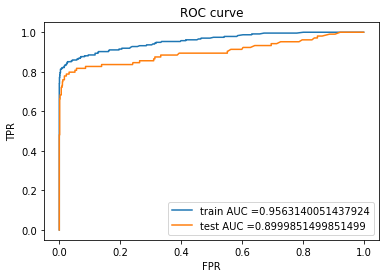

-----------------Confusion Matrix---------------------


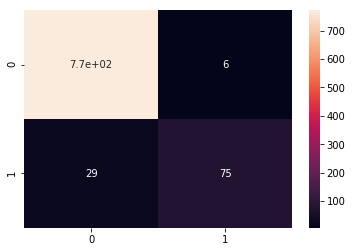

In [83]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=47)
BG=BaggingClassifier(n_estimators=23,base_estimator=DT)
BG.fit(train_x,train_y)
pred = BG.predict(test_x)
print('Accuracy',accuracy_score(test_y,pred))
print('--------------------------------------')
roc_curve(BG,47)
print('-----------------Confusion Matrix---------------------')


In [84]:
print('classification Report \n',classification_report(test_y,pred))

classification Report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       777
           1       0.93      0.72      0.81       104

    accuracy                           0.96       881
   macro avg       0.94      0.86      0.89       881
weighted avg       0.96      0.96      0.96       881



In [85]:
print('mean cross_val_score',cross_val_score(BG,x,y,cv=5,scoring='accuracy').mean())
print('std deviation of cross_val_score',cross_val_score(BG,x,y,cv=5,scoring='accuracy').std())

mean cross_val_score 0.9512950665785904
std deviation of cross_val_score 0.007340061427666254


In [86]:
df_output=pd.DataFrame()
df_output['actual churn']=test_y
df_output['predicted churn']=pred
df_output

actual churn  predicted churn
2731             1                0
2921             0                0
1698             0                0
633              0                0
966              1                0
...            ...              ...
97               0                0
1                0                0
1394             0                0
203              0                0
1667             0                0

[881 rows x 2 columns]

In [87]:
df_output[['actual churn','predicted churn']].to_csv('predicted_churn.csv',index=False)

In [88]:
from sklearn.externals import joblib
joblib.dump(BG,"BG_CHURN.pkl")

['BG_CHURN.pkl']

# Conclusion :-

This project was about predicting the churn or exiting of the customers from a telecom company. In this project the churn to be true or false totally depends on various features which may or may not satisfy the customers . Therefore we have analysed each and every attributes carefully in order to model efficiently the prediction .

In this project we have encoded the categoriacl value into the numerical form , we have also  visualised the data using different plots to get the trends and finding related to the churn of a customer.

We did not find any Null value in the dataset. We have also performed feature engineering using correlation matrix and also treated the skewness . With the help of Zscore we have treated the outliers and then mormalised the data using Standard Scaler.

Lastly by using several classification algoritm we have predicted the result and by looking into Accuracy , Cross Val score , Auc Score and Confusion matrix BaggingClassifier has been selected as the final Model.

At the end we have saved the model